Notebook to test the functions from local.py and transformation.py

In [1]:

%load_ext tensorboard

import tifffile
import numpy as np
from pathlib import Path
from typing import Union, List, Tuple
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from torch import no_grad, cuda
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import torchvision.transforms.v2 as transforms_v2

from datetime import datetime

import sys
import os
sys.path.append("/localscratch/devel/the_exceptionals/model/")
from unet import UNet

sys.path.append("/localscratch/devel/the_exceptionals/util/")
from visualize import show_random_dataset_image_with_prediction

sys.path.append("/localscratch/devel/the_exceptionals/data/")
import local
from sampler import show_random_sampler_image, Sampler

from train import train
#from transformation import augment_batch, normalize, transformation

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [3]:
img_dir = "/group/dl4miacourse/exceptionals/norm_img/train/images"
mask_dir = "/localscratch/exceptionals/train_images2D/masks"

trainData = local.CellDataset(img_dir = img_dir,
                              mask_dir = mask_dir, transform = transforms_v2.RandomCrop(256))

In [4]:
sampleData = Sampler(trainData)

sampleData.sample_crops()

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


In [5]:
sampleData.loaded_input_patches[1].shape

torch.Size([1, 256, 256])

Image size is {torch.Size([256, 256])}


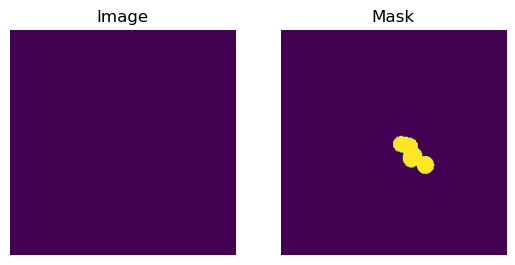

In [19]:
show_random_sampler_image(sampleData)